In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Define the points (t, x_t, y_t)
t_values = np.array([0, 60, 120, 180, 240, 300, 360, 420, 480, 540])
x_values = np.array([0, 2.73, 2.70, 2.62, 2.68, 2.68, 2.64, 2.72, 2.69, 2.55])
y_values = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])

In [17]:
# Function to evaluate a polynomial using Horner's method
def evaluate_polynomial(coefficients, t_values):
    results = []
    for t in t_values:
        result = 0
        for coeff in reversed(coefficients):
            result = result * t + coeff
        results.append(result)
    return np.array(results)

# Create matrix A for basis D (normalized basis with (t - 480)/30)
def create_matrix_A_basis_D(t_values):
    n = len(t_values)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = ((t_values[i] - 480) / 30) ** j
    return A

In [18]:
# Create matrix A for degree 9 and solve for coefficients c_x and c_y
A = create_matrix_A_basis_D(t_values)
c_x = np.linalg.solve(A, x_values)
c_y = np.linalg.solve(A, y_values)

In [19]:
# Evaluate p9(t) for x and y using Horner's method for every frame t in [0, 540]
t_eval_frame = np.arange(0, 541, 1)  # t = 0, 1, 2, ..., 540
x_p9_frame = evaluate_polynomial(c_x, (t_eval_frame - 480) / 30)
y_p9_frame = evaluate_polynomial(c_y, (t_eval_frame - 480) / 30)

In [20]:
# Add a new point at t = 600 (x_t = 2.336957, y_t = 50)
t_new = 600
x_new = 2.336957
y_new = 50

In [21]:
# Create new matrix A for degree 10 interpolation
t_extended = np.append(t_values, t_new)
x_extended = np.append(x_values, x_new)
y_extended = np.append(y_values, y_new)

In [22]:
# Add the new basis Phi_10(t)
phi_10 = ((t_extended - 480) / 30) ** 10

# Compute residuals for the new point
residual_x = x_new - evaluate_polynomial(c_x, [(t_new - 480) / 30])[0]
residual_y = y_new - evaluate_polynomial(c_y, [(t_new - 480) / 30])[0]

# Compute c_10 using the residuals
c_10_x = residual_x / phi_10[-1]
c_10_y = residual_y / phi_10[-1]

# Extend the coefficients to include c_10
c_x_extended = np.append(c_x, c_10_x)
c_y_extended = np.append(c_y, c_10_y)

# Evaluate p10(t) with the updated coefficients
t_eval_extended = np.arange(0, 541, 1)  # t = 0, 1, 2, ..., 600
x_p10_frame = evaluate_polynomial(c_x_extended, (t_eval_extended - 480) / 30)
y_p10_frame = evaluate_polynomial(c_y_extended, (t_eval_extended - 480) / 30)

In [23]:
print("c_x:", c_x)
print("c_y:", c_y)

print("c_x_extended:", c_x_extended)
print("c_y_extended:", c_y_extended)

c_x: [ 2.69000000e+00 -1.31482143e-01 -6.47968750e-02  1.11115245e-02
  1.14981554e-02  2.70296224e-03  3.13096788e-04  2.00931610e-05
  6.98513455e-07  1.04954634e-08]
c_y: [ 4.00000000e+01  2.50000000e+00 -5.30193173e-15  1.86927193e-15
  1.38781182e-15  3.26315253e-16  3.95516953e-17  2.65990933e-18
  9.43083794e-20  1.37676466e-21]
c_x_extended: [ 2.69000000e+00 -1.31482143e-01 -6.47968750e-02  1.11115245e-02
  1.14981554e-02  2.70296224e-03  3.13096788e-04  2.00931610e-05
  6.98513455e-07  1.04954634e-08 -6.55464458e-06]
c_y_extended: [ 4.00000000e+01  2.50000000e+00 -5.30193173e-15  1.86927193e-15
  1.38781182e-15  3.26315253e-16  3.95516953e-17  2.65990933e-18
  9.43083794e-20  1.37676466e-21 -8.40256684e-19]


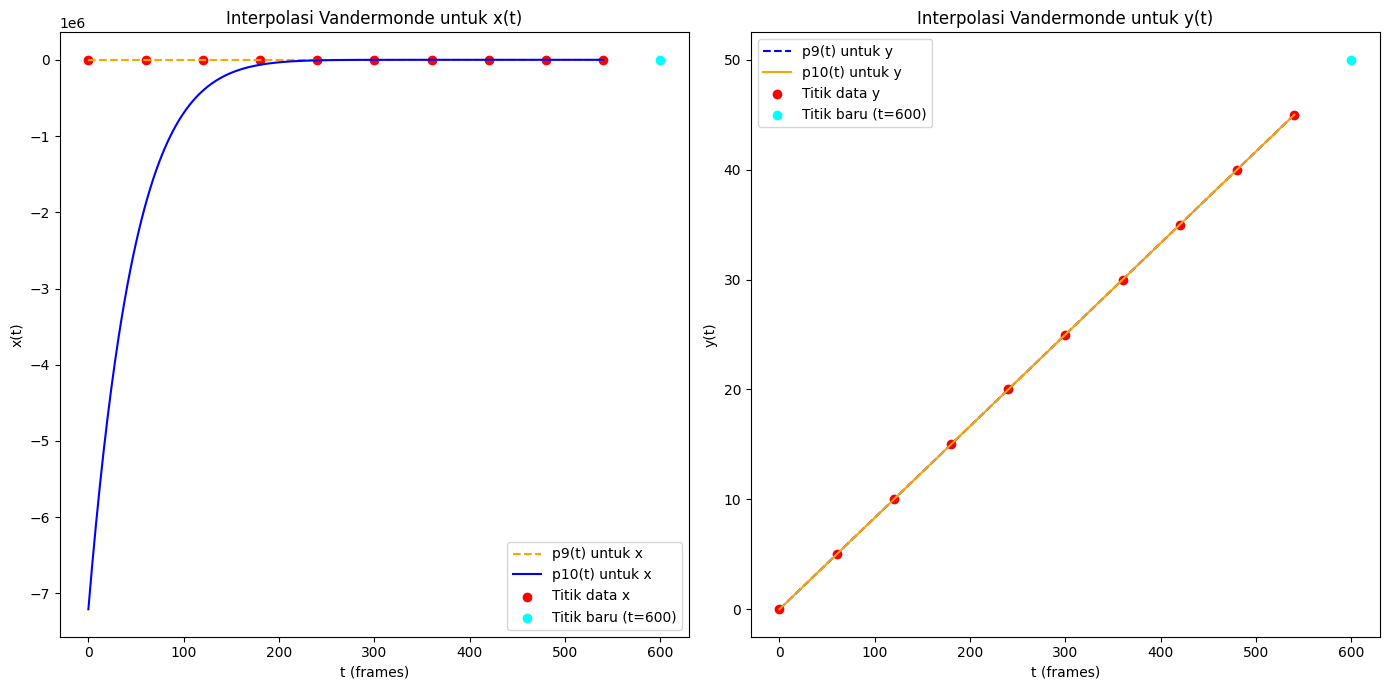

In [24]:
# Plot results
plt.figure(figsize=(14, 7))

# Plot for x(t)
plt.subplot(1, 2, 1)
plt.plot(t_eval_frame, x_p9_frame, '--', color='orange', label="p9(t) untuk x")
plt.plot(t_eval_frame, x_p10_frame, '-', color='blue', label="p10(t) untuk x")
plt.scatter(t_values, x_values, color='red', label="Titik data x")
plt.scatter([t_new], [x_new], color='cyan', label="Titik baru (t=600)")
plt.title("Interpolasi Vandermonde untuk x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.legend()

# Plot for y(t)
plt.subplot(1, 2, 2)
plt.plot(t_eval_frame, y_p9_frame, '--', color='blue', label="p9(t) untuk y")
plt.plot(t_eval_frame, y_p10_frame, '-', color='orange', label="p10(t) untuk y")
plt.scatter(t_values, y_values, color='red', label="Titik data y")
plt.scatter([t_new], [y_new], color='cyan', label="Titik baru (t=600)")
plt.title("Interpolasi Vandermonde untuk y(t)")
plt.xlabel("t (frames)")
plt.ylabel("y(t)")
plt.legend()

plt.tight_layout()
plt.show()

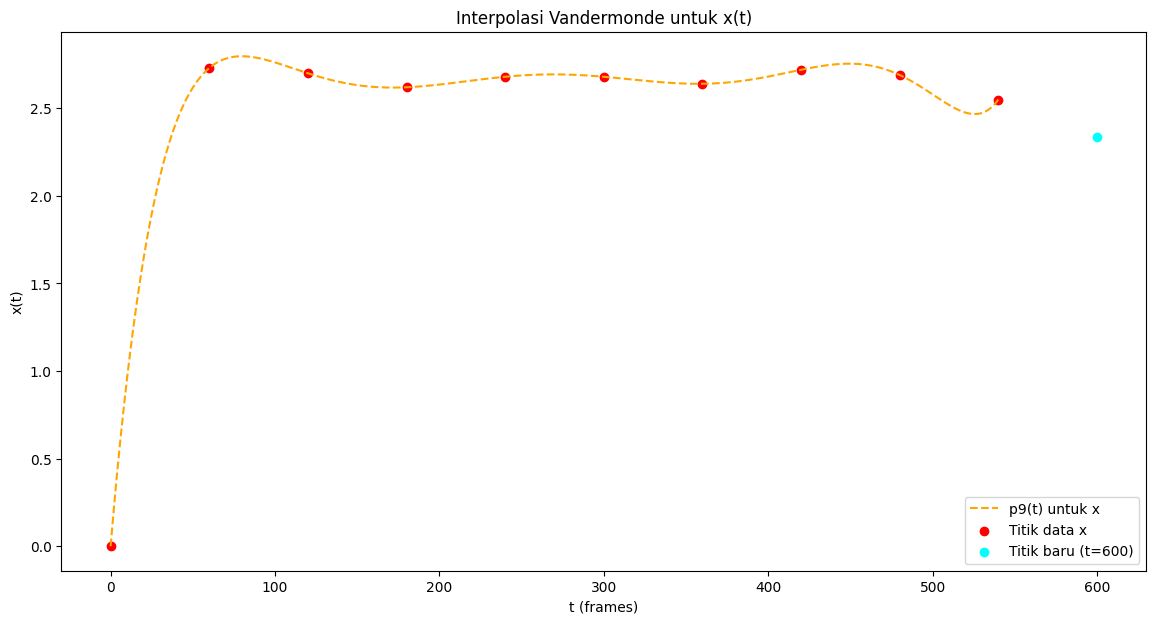

In [25]:
# Plot results
plt.figure(figsize=(14, 7))

# Plot for x(t)
plt.plot(t_eval_frame, x_p9_frame, '--', color='orange', label="p9(t) untuk x")
plt.scatter(t_values, x_values, color='red', label="Titik data x")
plt.scatter([t_new], [x_new], color='cyan', label="Titik baru (t=600)")
plt.title("Interpolasi Vandermonde untuk x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.legend()

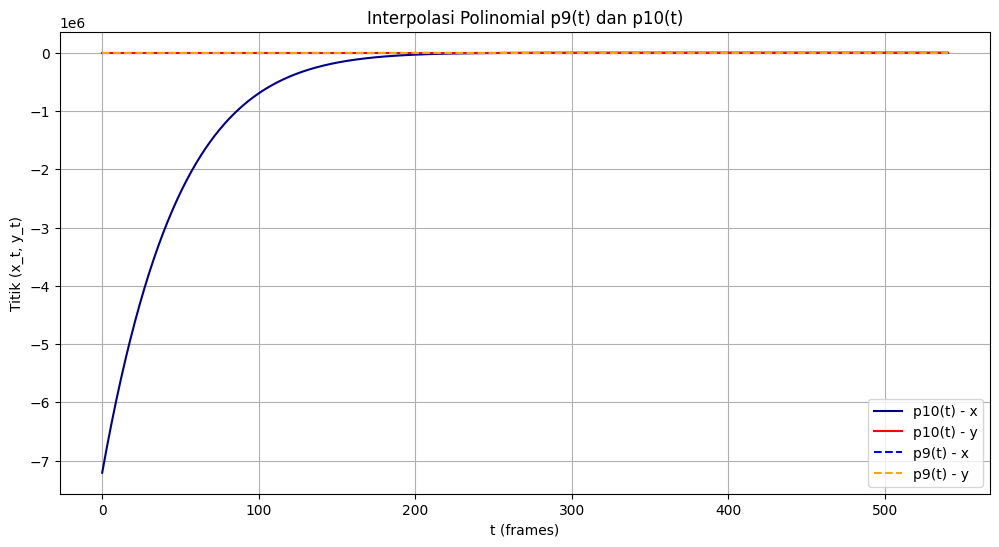

In [26]:
# Plot p9(t) and p10(t) in one plot
plt.figure(figsize=(12, 6))
plt.plot(t_eval_extended, x_p10_frame, label="p10(t) - x", linestyle="-", color="darkblue")
plt.plot(t_eval_extended, y_p10_frame, label="p10(t) - y", linestyle="-", color="red")
plt.plot(t_eval_frame, x_p9_frame, label="p9(t) - x", linestyle="--", color="blue")
plt.plot(t_eval_frame, y_p9_frame, label="p9(t) - y", linestyle="--", color="orange")
# plt.scatter(t_extended, x_extended, color="blue", label="Data Points (x)", zorder=5)
# plt.scatter(t_extended, y_extended, color="orange", label="Data Points (y)", zorder=5)
plt.xlabel("t (frames)")
plt.ylabel("Titik (x_t, y_t)")
plt.title("Interpolasi Polinomial p9(t) dan p10(t)")
plt.legend()
plt.grid(True)
plt.show()

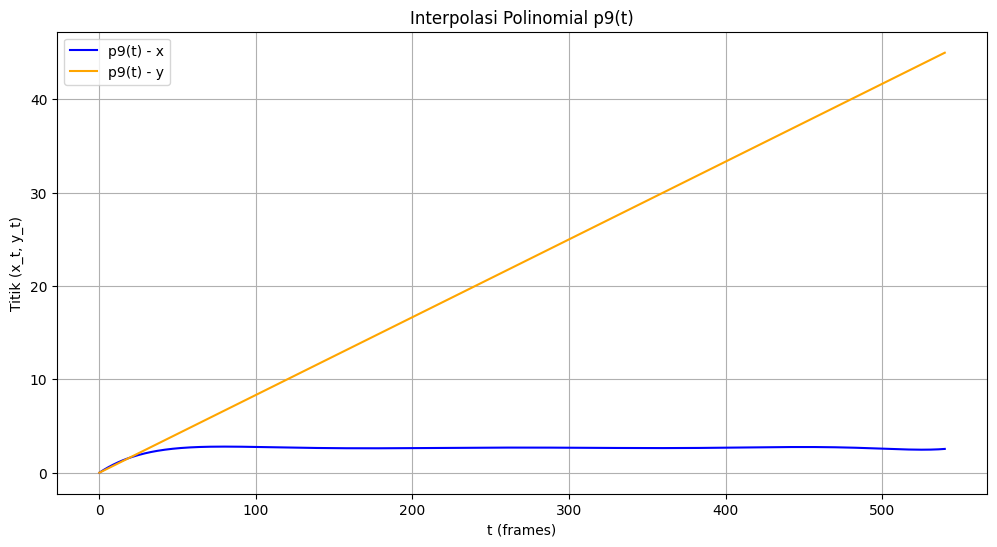

In [27]:
# Plot p9(t) results
plt.figure(figsize=(12, 6))
plt.plot(t_eval_frame, x_p9_frame, label="p9(t) - x", linestyle="-", color="blue")
plt.plot(t_eval_frame, y_p9_frame, label="p9(t) - y", linestyle="-", color="orange")
# plt.scatter(t_values, x_values, color="blue", label="Data Points (x)", zorder=5)
# plt.scatter(t_values, y_values, color="orange", label="Data Points (y)", zorder=5)
plt.xlabel("t (frames)")
plt.ylabel("Titik (x_t, y_t)")
plt.title("Interpolasi Polinomial p9(t)")
plt.legend()
plt.grid(True)
plt.show()

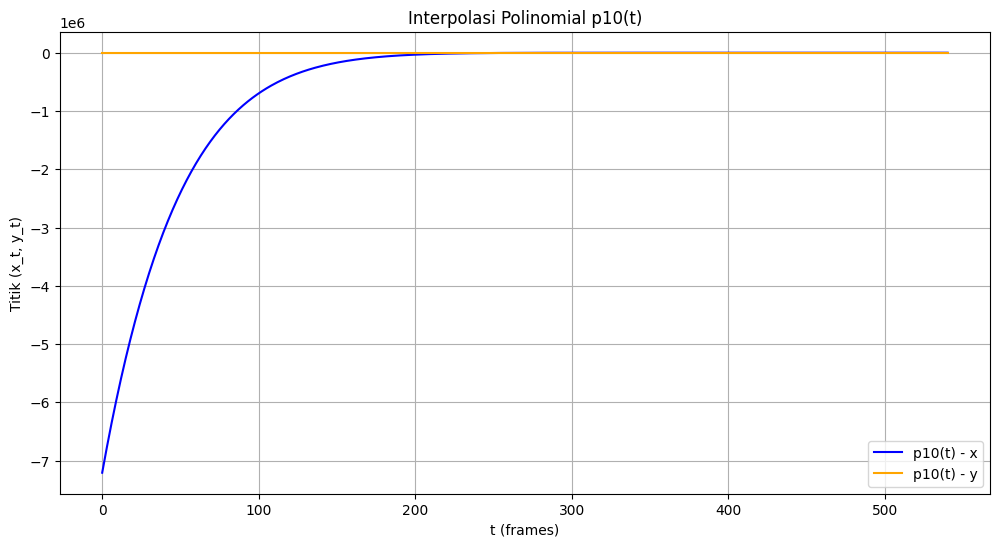

In [28]:
# Plot p10(t) results
plt.figure(figsize=(12, 6))
plt.plot(t_eval_extended, x_p10_frame, label="p10(t) - x", linestyle="-", color="blue")
plt.plot(t_eval_extended, y_p10_frame, label="p10(t) - y", linestyle="-", color="orange")
# plt.scatter(t_extended, x_extended, color="blue", label="Data Points (x)", zorder=5)
# plt.scatter(t_extended, y_extended, color="orange", label="Data Points (y)", zorder=5)
plt.xlabel("t (frames)")
plt.ylabel("Titik (x_t, y_t)")
plt.title("Interpolasi Polinomial p10(t)")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Construct the polynomial expressions for p9 and p10
from sympy import symbols, expand

# Define the symbolic variable for t
t = symbols('t')

# Construct normalized basis (t - 480)/30 for symbolic calculations
normalized_t = (t - 480) / 30

# Construct p9(t)
p9 = sum(c * (normalized_t ** i) for i, c in enumerate(c_x))
p9_expanded = expand(p9)

# Construct p10(t)
c10_term = c_10_x * (normalized_t ** 10)
p10 = p9 + c10_term
p10_expanded = expand(p10)

p9_expanded, p10_expanded

(5.33224781604544e-22*t**9 - 1.23888625412188e-18*t**8 + 1.25329808944999e-15*t**7 - 7.42803712277169e-13*t**6 + 2.92631619370181e-10*t**5 - 8.05246109825222e-8*t**4 + 1.51494494660025e-5*t**3 - 0.00178514908509712*t**2 + 0.112194246031742*t - 1.03028696685215e-13,
 -1.1100348159415e-20*t**10 + 5.32822043899736e-17*t**9 - 1.15089648603069e-13*t**8 + 1.47314417735612e-10*t**7 - 1.23743800931231e-7*t**6 + 7.12762941130704e-5*t**5 - 0.0285104811171914*t**4 + 7.82001074055723*t**3 - 1407.60099154848*t**2 + 150144.027543515*t - 7206907.93676492)